# World happiness - EDA


Este notebook realiza un análisis exploratorio de datos (EDA) sobre el conjunto de datos , que abarca los años 2015 a 2019. El objetivo es limpiar, transformar y consolidar los datos en un formato unificado para análisis posteriores. El conjunto de datos contiene métricas relacionadas con los puntajes de felicidad y factores contribuyentes en diferentes países y regiones.

In [1]:
import os 
print(os.getcwd())

try:
    os.chdir("../../workshop-3")

except FileNotFoundError:
    print("""
        FileNotFoundError - The directory may not exist or you might not be in the specified path.
        If this has already worked, do not run this block again, as the current directory is already set to workshop-003.
        """)
    
print(os.getcwd())

c:\semestres_uao\ETL\ETL_workshops\workshop_003\workshop-3\notebooks
c:\semestres_uao\ETL\ETL_workshops\workshop_003\workshop-3


### modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Carga y Exploración Inicial de Datos

### Resumen del Conjunto de Datos
El conjunto de datos de **World Happiness** está dividido en archivos CSV separados para cada año (2015–2019), almacenados en el directorio `./data/raw/`. Cada archivo contiene **puntajes de felicidad** y métricas relacionadas para varios países. Los datos se cargan en *DataFrames* de Pandas individuales (`df_2015`, `df_2016`, `df_2017`, `df_2018`, `df_2019`) para su procesamiento.

### Columnas en los Conjuntos de Datos Originales
Los conjuntos de datos de cada año tienen nombres de columnas y estructuras ligeramente diferentes, pero en general incluyen las siguientes métricas clave:

- **Country** (*País*): El nombre del país (e.g., Suiza, Dinamarca).
- **Region** (*Región*): La región geográfica del país (e.g., Europa Occidental, África Subsahariana). *Nota*: Esta columna no está presente en los datos de 2017–2019.
- **Happiness Score** (*Puntaje de Felicidad*): Un puntaje numérico que representa el nivel de felicidad de un país, generalmente en una escala de 0 a 10.
- **Economy (GDP per Capita)** (*Economía*): Una medida del producto económico per cápita del país, que contribuye al puntaje de felicidad.
- **Family/Social Support** (*Familia/Soporte Social*): Una métrica que representa el soporte social o relaciones familiares, con nombres ligeramente diferentes entre años.
- **Health (Life Expectancy)** (*Salud*): Una medida de la esperanza de vida, reflejando las condiciones de salud.
- **Freedom** (*Libertad*): Un puntaje que indica la percepción de libertad para tomar decisiones de vida.
- **Trust (Government Corruption)/Perceptions of Corruption** (*Confianza en el Gobierno/Percepción de Corrupción*): Una medida de la confianza en el gobierno o los niveles percibidos de corrupción.
- **Generosity** (*Generosidad*): Un puntaje que refleja la generosidad de la población.
- **Happiness Rank/Overall Rank** (*Rango de Felicidad*): La clasificación de los países según sus puntajes de felicidad (no presente en todos los años).
- **Columnas Adicionales**: Algunos años incluyen columnas adicionales como `Standard Error` (2015), `Lower/Upper Confidence Interval` (2016), `Whisker.high/Whisker.low` (2017) o `Dystopia Residual` (2015–2017).

### Carga de Datos
Los datos de cada año se cargan usando `pd.read_csv()`. El método `.head(3)` se usa para previsualizar las primeras tres filas, y `.info()` proporciona un resumen de la estructura del *DataFrame*, incluyendo nombres de columnas, tipos de datos y conteos de valores no nulos.

Por ejemplo, el conjunto de datos de 2015 tiene 158 entradas con 12 columnas, todas sin valores nulos, como se muestra a continuación:

```python
df_2015 = pd.read_csv('./data/raw/2015.csv')
df_2015.head(3)
df_2015.info()

## 2015


In [3]:
df_2015 = pd.read_csv('./data/raw/2015.csv')
df_2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [4]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df_2015 = df_2015.drop(['Standard Error', 'Dystopia Residual', 'Happiness Rank'], axis=1)
columns_rename = {
    'Economy (GDP per Capita)': 'economy',
    'Health (Life Expectancy)': 'health',
    'Trust (Government Corruption)': 'perceptions_of_corruption',
    'Family': 'family',
    'Freedom': 'freedom',
    'Generosity': 'generosity',
    'Happiness Score': 'happiness_score',
    'Country': 'country',
    'Region': 'region'
}
df_2015 = df_2015.rename(columns=columns_rename)
df_2015.head(3)

,country,region,happiness_score,economy,family,health,freedom,perceptions_of_corruption,generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139


### Agregar Columna de Año
Se agrega una columna year a cada DataFrame para indicar el año de los datos (e.g., df_2015['year'] = 2015). Esto facilita la combinación de los conjuntos de datos 

In [6]:
df_2015['year'] = 2015
df_2015.head(3)

,country,region,happiness_score,economy,family,health,freedom,perceptions_of_corruption,generosity,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015


In [7]:
print(df_2015.isnull().sum())

country                      0
region                       0
happiness_score              0
economy                      0
family                       0
health                       0
freedom                      0
perceptions_of_corruption    0
generosity                   0
year                         0
dtype: int64


## 2016


In [8]:
df_2016 = pd.read_csv('./data/raw/2016.csv')
df_2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [9]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [10]:
df_2016 = df_2016.drop(['Lower Confidence Interval', 'Upper Confidence Interval', 'Happiness Rank', 'Dystopia Residual'], axis=1)
columns_rename = {
    'Economy (GDP per Capita)': 'economy',
    'Health (Life Expectancy)': 'health',
    'Trust (Government Corruption)': 'perceptions_of_corruption',
    'Family': 'family',
    'Freedom': 'freedom',
    'Generosity': 'generosity',
    'Happiness Score': 'happiness_score',
    'Country': 'country',
    'Region': 'region'
}
df_2016 = df_2016.rename(columns=columns_rename)
df_2016.head(3)

,country,region,happiness_score,economy,family,health,freedom,perceptions_of_corruption,generosity
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678


In [11]:
df_2016['year'] = 2016
df_2016.head(3)

,country,region,happiness_score,economy,family,health,freedom,perceptions_of_corruption,generosity,year
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016


In [12]:
print(df_2016.isnull().sum())

country                      0
region                       0
happiness_score              0
economy                      0
family                       0
health                       0
freedom                      0
perceptions_of_corruption    0
generosity                   0
year                         0
dtype: int64


## 2017


In [13]:
df_2017 = pd.read_csv('./data/raw/2017.csv')
df_2017.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


In [14]:
df_2017 = df_2017.drop(['Dystopia.Residual', 'Happiness.Rank', 'Whisker.high', 'Whisker.low'], axis=1)
columns_rename = {
    'Economy..GDP.per.Capita.': 'economy',
    'Health..Life.Expectancy.': 'health',
    'Trust..Government.Corruption.': 'perceptions_of_corruption',
    'Family': 'family',
    'Freedom': 'freedom',
    'Generosity': 'generosity',
    'Happiness.Score': 'happiness_score',
    'Country': 'country',
}
df_2017 = df_2017.rename(columns=columns_rename)
df_2017.head(3)

,country,happiness_score,economy,family,health,freedom,generosity,perceptions_of_corruption
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527


In [15]:
df_2017['year'] = 2017
df_2017.head(3)

,country,happiness_score,economy,family,health,freedom,generosity,perceptions_of_corruption,year
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017


In [16]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    155 non-null    object 
 1   happiness_score            155 non-null    float64
 2   economy                    155 non-null    float64
 3   family                     155 non-null    float64
 4   health                     155 non-null    float64
 5   freedom                    155 non-null    float64
 6   generosity                 155 non-null    float64
 7   perceptions_of_corruption  155 non-null    float64
 8   year                       155 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 11.0+ KB


In [17]:
print(df_2017.isnull().sum())

country                      0
happiness_score              0
economy                      0
family                       0
health                       0
freedom                      0
generosity                   0
perceptions_of_corruption    0
year                         0
dtype: int64


## 2018

In [18]:
df_2018 = pd.read_csv('./data/raw/2018.csv')
df_2018.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [19]:
df_2018 = df_2018.drop(['Overall rank'], axis=1)
columns_rename = {
    'GDP per capita': 'economy',
    'Healthy life expectancy': 'health',
    'Perceptions of corruption': 'perceptions_of_corruption',
    'Social support': 'family',
    'Freedom to make life choices': 'freedom',
    'Generosity': 'generosity',
    'Score': 'happiness_score',
    'Country or region': 'country',
}
df_2018 = df_2018.rename(columns=columns_rename)
df_2018.head(3)

,country,happiness_score,economy,family,health,freedom,generosity,perceptions_of_corruption
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [20]:
df_2018['year'] = 2018
df_2018.head(3)

,country,happiness_score,economy,family,health,freedom,generosity,perceptions_of_corruption,year
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018


In [21]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    156 non-null    object 
 1   happiness_score            156 non-null    float64
 2   economy                    156 non-null    float64
 3   family                     156 non-null    float64
 4   health                     156 non-null    float64
 5   freedom                    156 non-null    float64
 6   generosity                 156 non-null    float64
 7   perceptions_of_corruption  155 non-null    float64
 8   year                       156 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [22]:
print(df_2018.isnull().sum())

country                      0
happiness_score              0
economy                      0
family                       0
health                       0
freedom                      0
generosity                   0
perceptions_of_corruption    1
year                         0
dtype: int64


## 2019

In [23]:
df_2019 = pd.read_csv('./data/raw/2019.csv')
df_2019.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [24]:
df_2019 = df_2019.drop(['Overall rank'], axis=1)
columns_rename = {
    'Country or region': 'country',
    'GDP per capita': 'economy',
    'Healthy life expectancy': 'health',
    'Freedom to make life choices': 'freedom',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'perceptions_of_corruption',
    'Social support': 'family',
    'Score': 'happiness_score'
}
df_2019 = df_2019.rename(columns=columns_rename)
df_2019.head(3)

,country,happiness_score,economy,family,health,freedom,generosity,perceptions_of_corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [25]:
df_2019['year'] = 2019
df_2019.head(3)

,country,happiness_score,economy,family,health,freedom,generosity,perceptions_of_corruption,year
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019


In [26]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    156 non-null    object 
 1   happiness_score            156 non-null    float64
 2   economy                    156 non-null    float64
 3   family                     156 non-null    float64
 4   health                     156 non-null    float64
 5   freedom                    156 non-null    float64
 6   generosity                 156 non-null    float64
 7   perceptions_of_corruption  156 non-null    float64
 8   year                       156 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [27]:
print(df_2019.isnull().sum())

country                      0
happiness_score              0
economy                      0
family                       0
health                       0
freedom                      0
generosity                   0
perceptions_of_corruption    0
year                         0
dtype: int64


### Manejo de Valores Faltantes

Se verifican los valores faltantes usando df.isnull().sum(). Los conjuntos de datos de 2015, 2016, 2017 y 2019 no tienen valores faltantes en las columnas retenidas. Sin embargo, el conjunto de datos de 2018 tiene un valor faltante en la columna government_corruption.

Además, la columna region no está presente en los datos crudos de 2017, 2018 y 2019. Para abordar esto:

### Imputación de Región:
Se crea un diccionario (dict_region) combinando las columnas country y region de los datos de 2015 y 2016, eliminando duplicados.
Este diccionario se usa para asignar regiones a los países en los conjuntos de datos de 2017, 2018 y 2019.
Para países no encontrados en los datos de regiones de 2015–2016 (Taiwan Province of China, Hong Kong S.A.R., China, Trinidad & Tobago, Northern Cyprus, North Macedonia, Gambia), se aplican asignaciones de regiones manuales basadas en el contexto geográfico y cultural:

Taiwan Province of China → Eastern Asia

Hong Kong S.A.R., China → Eastern Asia

Trinidad & Tobago → Latin America and Caribbean

Northern Cyprus → Western Europe

North Macedonia → Central and Eastern Europe

Gambia → Sub-Saharan Africa
### Imputación de Government Corruption:
El único valor faltante en government_corruption (2018) se rellena con la mediana de la columna government_corruption en todos los años para mantener consistencia y evitar sesgos.

In [42]:
print(df_2018.isnull().sum())

country                      0
happiness_score              0
economy                      0
family                       0
health                       0
freedom                      0
generosity                   0
perceptions_of_corruption    1
year                         0
region                       2
dtype: int64


In [29]:

df_region = pd.concat([df_2015[['country', 'region']], df_2016[['country', 'region']]])


df_region = df_region.drop_duplicates(subset=['country'])

dict_region = df_region.set_index('country')['region'].to_dict()

for year_df in [df_2017, df_2018, df_2019]:
    year_df['region'] = year_df['country'].map(dict_region)
    
all_years_df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

In [30]:
print(all_years_df.isnull().sum())

country                      0
region                       8
happiness_score              0
economy                      0
family                       0
health                       0
freedom                      0
perceptions_of_corruption    1
generosity                   0
year                         0
dtype: int64


In [35]:
median_perceptions_of_corruption_value = all_years_df['perceptions_of_corruption'].median()
all_years_df['perceptions_of_corruption'] = all_years_df['perceptions_of_corruption'].fillna(median_perceptions_of_corruption_value)

In [31]:

list_dfs = [df_2015, df_2016, df_2017, df_2018, df_2019]
list_years = [2015, 2016, 2017, 2018, 2019]

for df, year in zip(list_dfs, list_years):
    print(f"--- Info DataFrame Year: {year} ---")
    df.info()
    print("\n")


--- Info DataFrame Year: 2015 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    158 non-null    object 
 1   region                     158 non-null    object 
 2   happiness_score            158 non-null    float64
 3   economy                    158 non-null    float64
 4   family                     158 non-null    float64
 5   health                     158 non-null    float64
 6   freedom                    158 non-null    float64
 7   perceptions_of_corruption  158 non-null    float64
 8   generosity                 158 non-null    float64
 9   year                       158 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 12.5+ KB


--- Info DataFrame Year: 2016 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (tota

In [32]:

missing_region = all_years_df[all_years_df['region'].isnull()]
print(missing_region[['country', 'year']])


                      country  year
347  Taiwan Province of China  2017
385   Hong Kong S.A.R., China  2017
507         Trinidad & Tobago  2018
527           Northern Cyprus  2018
664         Trinidad & Tobago  2019
689           Northern Cyprus  2019
709           North Macedonia  2019
745                    Gambia  2019


In [33]:
all_years_df['region'].unique()


array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia', nan], dtype=object)

In [34]:
manual_region_corrections = {
    'Taiwan Province of China': 'Eastern Asia',
    'Hong Kong S.A.R., China': 'Eastern Asia',
    'Trinidad & Tobago': 'Latin America and Caribbean',
    'Northern Cyprus': 'Western Europe',
    'North Macedonia': 'Central and Eastern Europe',
    'Gambia': 'Sub-Saharan Africa'
}

all_years_df['region'] = all_years_df['region'].fillna(
    all_years_df['country'].map(manual_region_corrections)
)


In [36]:
print(all_years_df.isnull().sum())

country                      0
region                       0
happiness_score              0
economy                      0
family                       0
health                       0
freedom                      0
perceptions_of_corruption    0
generosity                   0
year                         0
dtype: int64


In [37]:
print(all_years_df.duplicated().sum())

0


In [38]:
unique_countries = all_years_df['country'].unique()
print(len(unique_countries), unique_countries)

170 ['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia'
 'Ph

In [39]:
per_year = all_years_df.groupby('year').head(1)
print(per_year)

         country          region  happiness_score   economy    family  \
0    Switzerland  Western Europe            7.587  1.396510  1.349510   
158      Denmark  Western Europe            7.526  1.441780  1.163740   
315       Norway  Western Europe            7.537  1.616463  1.533524   
470      Finland  Western Europe            7.632  1.305000  1.592000   
626      Finland  Western Europe            7.769  1.340000  1.587000   

       health   freedom  perceptions_of_corruption  generosity  year  
0    0.941430  0.665570                   0.419780    0.296780  2015  
158  0.795040  0.579410                   0.444530    0.361710  2016  
315  0.796667  0.635423                   0.315964    0.362012  2017  
470  0.874000  0.681000                   0.393000    0.202000  2018  
626  0.986000  0.596000                   0.393000    0.153000  2019  


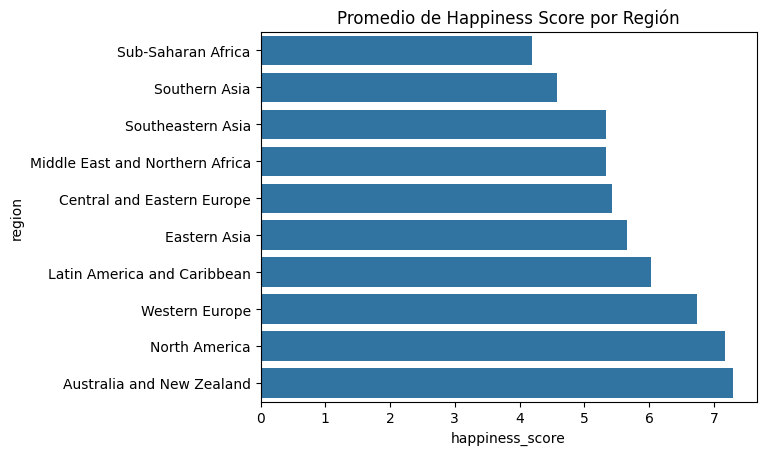

In [40]:
region_avg = all_years_df.groupby('region')['happiness_score'].mean().sort_values()
sns.barplot(x='happiness_score', y=region_avg.index, data=region_avg.reset_index())
plt.title('Promedio de Happiness Score por Región')
plt.show()

In [41]:
all_years_df.to_csv("./data/transform_data/transform_happiness_score.csv", index=False)